## Assignment A2: Evaluate a machine learning model using Classification

### TASK 1: Dataset Selection and Preprocessing

The dataset selected for this assignment is "Drug Classification". This dataset includes statistics on how drugs are categorized according to the diagnosis and basic patient information. To forecast the type of medication that could be best for the patient, a machine learning model is required. Information about a number of patients with the same illness has been gathered. Each patient responded differently to one of five medicines over their course of treatment: drugs A, B, C, X, and Y. Subsequently, a model is constructed to determine the drug that would be most suitable for a patient with the same illness in the future. This dataset's attributes include the patients' age, sex, blood pressure, cholesterol, and sodium to potassium ratio in their blood. The target is the drug to which each of these patients responded. This dataset serves as an example of a multiclass classifier. By using the training portion of the dataset, we can construct a decision tree and use it to forecast a patient's class or to prescribe drug to a new patient. This dataset contains 6 variables- 4 categorical, and 2 continuous.

In [4]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the dataset
drug_df = pd.read_csv(r'/Users/payalchavan/Documents/DataMining_Assignments/Assignment 2/drug200.csv')
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
#Take a look at the data structure
drug_df.shape

(200, 6)

In [8]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Data Preprocessing and Cleaning

In [11]:
#Check for missing values
drug_df.isnull().sum()   #no missing values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
#Check for any duplicate records
drug_df.duplicated().any()

False

In [13]:
#Find all categorical columns
cat_cols = drug_df.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [14]:
#Find the 'Drug' count
drug_df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [15]:
#Find the count for 'Sex', 'BP', & 'Cholestrol'
print(" \n",drug_df["Sex"].value_counts())
print(" \n",drug_df["BP"].value_counts())
print(" \n",drug_df["Cholesterol"].value_counts())

 
 Sex
M    104
F     96
Name: count, dtype: int64
 
 BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
 
 Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


In [16]:
#Find all numerical columns
drug_df.select_dtypes(include='number').columns

Index(['Age', 'Na_to_K'], dtype='object')

In [17]:
#skewAge = drug_df.Age.skew(axis = 0, skipna = True)
#print('Age skewness: ', skewAge)

In [18]:
#skewNatoK = drug_df.Na_to_K.skew(axis = 0, skipna = True)
#print('Na to K skewness: ', skewNatoK)

### Exploratory Data Analysis

In [20]:
#Summary Statistics of the dataframe
summary_stats = drug_df.describe()
print(summary_stats)

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


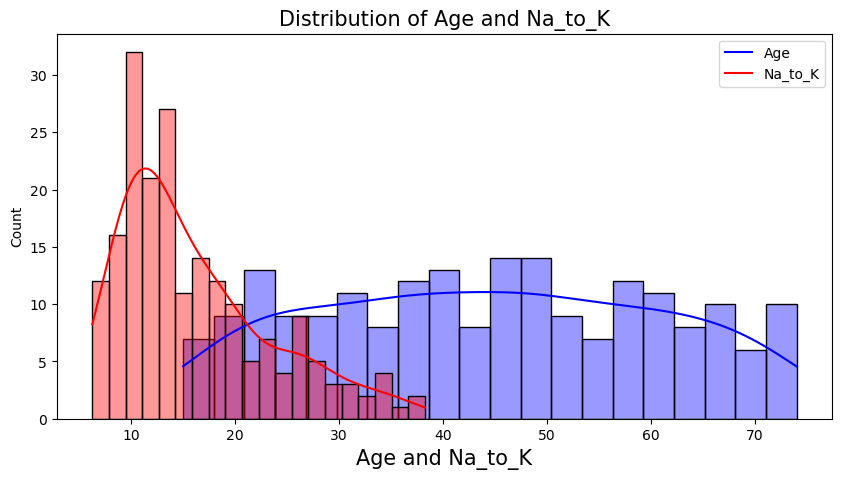

In [21]:
#Plot distribution of 'Age' & 'Na_to_K' using histplot
plt.figure(figsize=(10, 5))
sns.histplot(drug_df['Age'], bins=20, color='blue', alpha=0.4, kde=True);
sns.histplot(drug_df['Na_to_K'], bins=20, color='red', alpha=0.4, kde=True);
plt.xlabel('Age and Na_to_K', fontsize=15)
plt.title('Distribution of Age and Na_to_K', fontsize=15)
plt.legend(['Age', 'Na_to_K'])
plt.show()

Insights: From the above histplot, we can infer that the distribution of 'Age' column is symmetric, and the distribution of 'Na_to_K' column is moderately skewed.

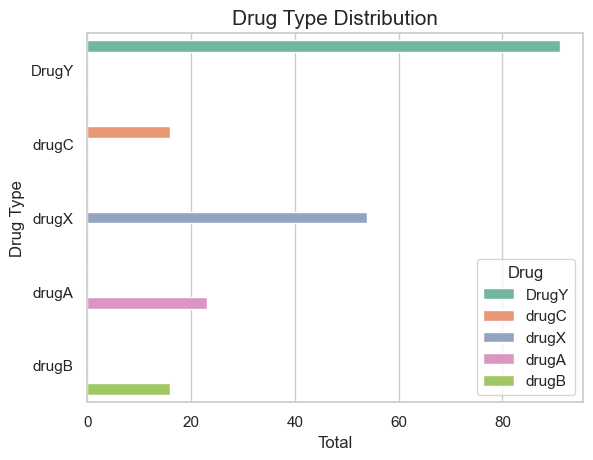

In [23]:
#Plot count plot for Distribution of DrugType
sns.set_theme(style="whitegrid")
sns.countplot(y="Drug", data=drug_df, palette="Set2", hue='Drug')
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.title('Drug Type Distribution', fontsize=15)
plt.show()

Insights: The above plot suggests that the DrugType distribution is imbalanced. Drug Y ranks highest in popularity, with drugs X, A, C, and B following closely after. This may indicate that DrugY is more widely used, more potent, or easier to get than the other medications. Alternatively, it can imply that Drug Y is prescribed for more ailments or uses than the others. 

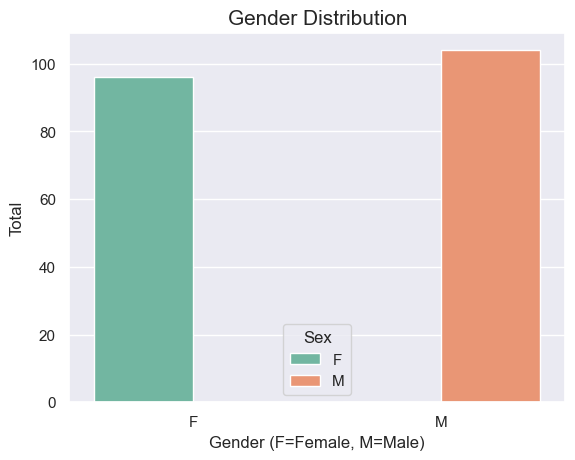

In [25]:
#Plot count plot for Gender Distribution
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=drug_df, palette="Set2", hue='Sex')
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.title('Gender Distribution', fontsize=15)
plt.show()

Insights: The above count plot shows that the Gender Distribution is balanced. Male patients are slightly higher than the female patients with a count of around 100.

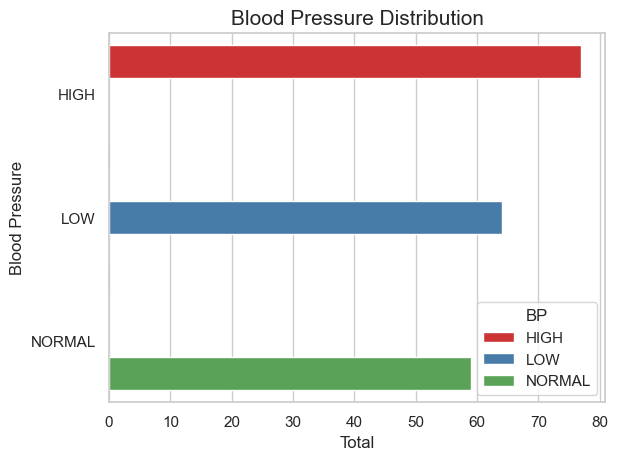

In [27]:
#Plot count plot for BP Distribution
sns.set_theme(style="whitegrid")
sns.countplot(y="BP", data=drug_df, palette="Set1", hue='BP')
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.title('Blood Pressure Distribution', fontsize=15)
plt.show()

Insights: The graphic illustrates the number of individuals with varying blood pressure readings. The red bar indicates that a large number of people have high blood pressure. This could indicate risk factors or health issues. The blue bar indicates that certain people have low blood pressure. This may potentially indicate a drug interaction or health problem. The green bar indicates that a small number of persons have normal blood pressure. As a result, their blood pressure is within a healthy range.

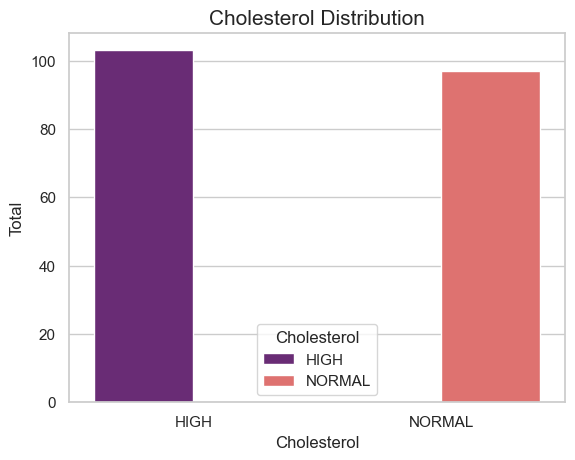

In [29]:
#Plot count plot for Cholesterol Distribution
sns.set_theme(style="whitegrid")
sns.countplot(x="Cholesterol", data=drug_df, palette="magma", hue='Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Total')
plt.title('Cholesterol Distribution', fontsize=15)
plt.show()

Insights: The above plot depicts that the Cholesterol Distribution is balanced. More patients tend to have higher cholesterol levels compared to the normal cholesterol levels. This could indicate that the population is at a higher risk of developing cardiovascular diseases, such as heart attack or stroke.

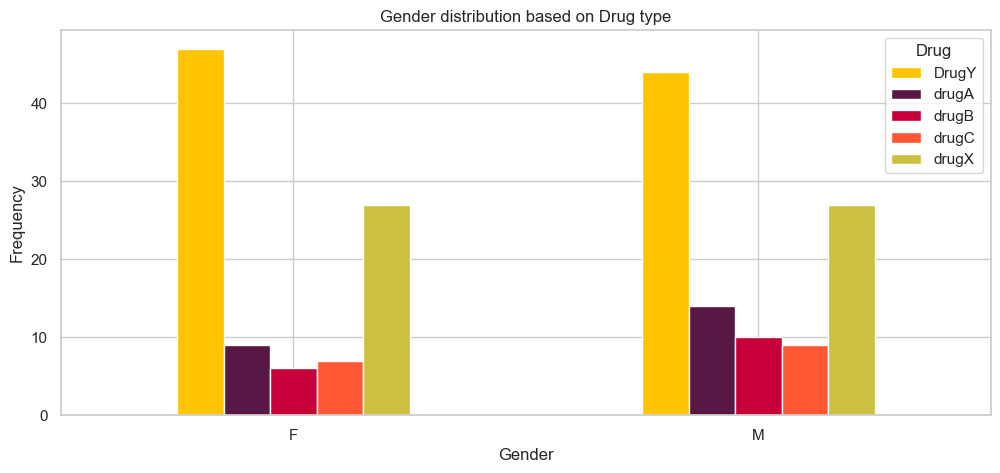

In [31]:
#Plot bar chart for Gender Distribution based on DrugType
pd.crosstab(drug_df.Sex,drug_df.Drug).plot(kind="bar",figsize=(12,5),color=['#FFC300','#581845' ,'#C70039','#FF5733','#CCC040'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Insights: Given that both genders 0:Female, 1:Male use Drug Y at the highest rates, the figure suggests that Drug Y is the most widely used and most addictive drug in society. This may suggest that Drug Y is more readily available, has more potent effects, or is less expensive than other medications. According to the plot, drug X is the only substance that is equally utilized by men and women and has a consistent distribution across genders. This could imply that there is no stigma attached to using medicine X, no adverse effects, and no gender bias.

In [33]:
#Convert categorical columns to numerical # excluding drug column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    if col != 'Drug':
        drug_df[col] = le.fit_transform(drug_df[col])

In [34]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


### TASK 2: Model Training

Rational behind model choice: The widely used and effective machine learning algorithm for multiclass classification is decision trees. Making forecasts for new data is possible with them as they are simple to interpret. Because they can handle both numerical and categorical data and carry out feature selection automatically, they are versatile and adaptive. The dataset which we are handling is an example of multiclass classification. When using decision trees, it is assumed that the dataset is complete or that any missing values have been adequately handled using imputation or other techniques. Firstly, as our dataset contains no missing values, I believe that the decision tree model would give the best accurate results than the other possible models. Secondly, each node of a decision tree is intended to contain homogeneous subgroups, or samples that are as similar to each other as feasible with respect to the target variable. This presumption aids in establishing distinct decision boundaries. Ofcoure, as we have seen from our exploratory data analysis that the distribution is balanced for most of the variables, which would tend to give us a good fit model.

In [37]:
#Divide dataset into features and target
X = drug_df.drop('Drug', axis=1)
y = drug_df['Drug']

In [38]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape:  (140, 5)
X_test shape:  (60, 5)
y_train shape (140,)
y_test shape (60,)


In [39]:
#Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

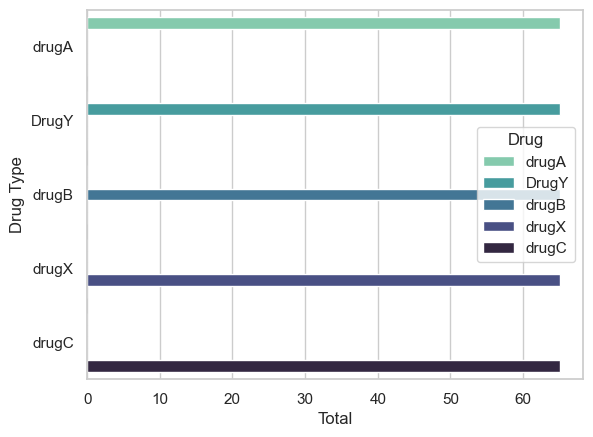

In [40]:
#Plot count plot for distrtibution of DrugType
sns.set_theme(style="whitegrid")
sns.countplot(y=y_train, data=drug_df, palette="mako_r", hue=y_train)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()   #the distribution of DrugType is now balanced

In [41]:
#Train the model with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
#Test the model with testing dataset
y_pred = dt.predict(X_test)

In [43]:
print("y_pred[:5]", y_pred[:5])
print("y_test[:5]", y_test[:5])

y_pred[:5] ['drugX' 'DrugY' 'drugX' 'drugC' 'DrugY']
y_test[:5] 95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
Name: Drug, dtype: object


### TASK 3: Performance Evaluation

In [45]:
#Evaluate the decision tree model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4)*100)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  98.33
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.83      0.91         6
       drugX       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60

[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  1]
 [ 0  0  0  0 18]]


### TASK 4: Analysis and Interpretation

Insights based on Performance Evaluation Metrics: I have tested our model using a range of evaluation indicators to see how well it predicts values. Let us discuss one by one the various evaluation metrics applied in our model.

1) Precision: The ability of a classification model to identify only the relevant data points is called precision. 

2) Recall: The ability of a classification model to identify all data points in a relevant class is called recall. 

3) F1-score: The F1 score integrates precision and recall into a single metric to gain a better understanding of model performance. 

4) Support: The support is the number of occurrences of each class in the dataset. It shows how balanced or imbalanced the data is.

Results: 
1) Drug Y has perfect scores on all measures, making it the best-performing drug. This indicates that the model successfully recognized Drug Y in each case and did not mix it up with any other drug.
2) Both drug A and drug B exhibit excellent performance, as seen by their flawless ratings in every parameter. But compared to DrugY, they have less support, which indicates that the data contains fewer examples of them. The results may be underrepresented or overfitted as a result, which could compromise their reliability.
3) Drug C performs moderately because it has a flawless precision score but a poor recall score. This indicates that while there was not a single occurrence of DrugC missed by the model, several instances of other medicines were mistakenly identified as DrugC. This suggests that DrugC may have certain characteristics with other drugs, making differentiation more difficult.
4) DrugX performs somewhat worse than DrugC because it has a perfect recall score but a lower precision score. This indicates that while the model successfully recognized every incidence of DrugX, it also mistakenly classified some instances of other medicines as DrugX. This may suggest that DrugX differs from other medications in a few ways, which would make it simpler to identify.
5) The model predicted 96.67% of the cases correctly, indicating a very high overall accuracy. This indicates that there is a high degree of confidence in the model's ability to distinguish between the various medications. However, since accuracy ignores the class imbalance and the trade-off between precision and recall, it is insufficient by itself to assess the model. As a result, it's crucial to take into account the other metrics.
6) The summary statistics that combine the outcomes for all classes are the weighted average and macro average values for each metric. All classes are given the same weight by the macro average, regardless of support. As a reflection of the data distribution, the weighted average assigns greater weight to the classes with greater support. When comparing the model's performance against other models or baselines, both averages can be helpful.

### TASK 5: Visualization

<Axes: >

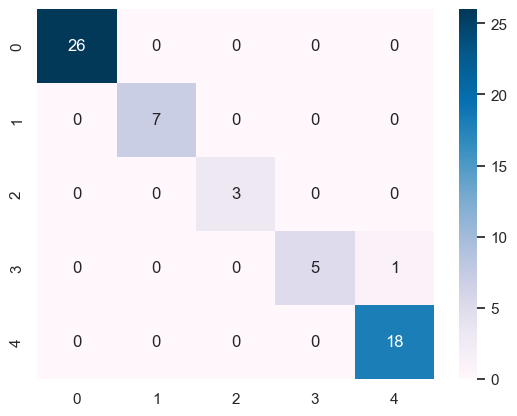

In [49]:
cm = np.array(confusion_matrix(y_test, y_pred))
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBu', fmt = 'g')

### TASK 6: Improvement Strategies

In [51]:
#Train the model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
#Test the model with testing dataset
y_pred_rf = rf.predict(X_test)

In [53]:
print("y_test: ", y_test[:5])
print("y_pred_rf: ", y_pred_rf[:5])

y_test:  95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
Name: Drug, dtype: object
y_pred_rf:  ['drugX' 'DrugY' 'drugX' 'drugC' 'DrugY']


In [54]:
#Evaluate the random forest model
print("Accuracy: ", round(accuracy_score(y_test, y_pred_rf), 4)*100)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy:  100.0
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]


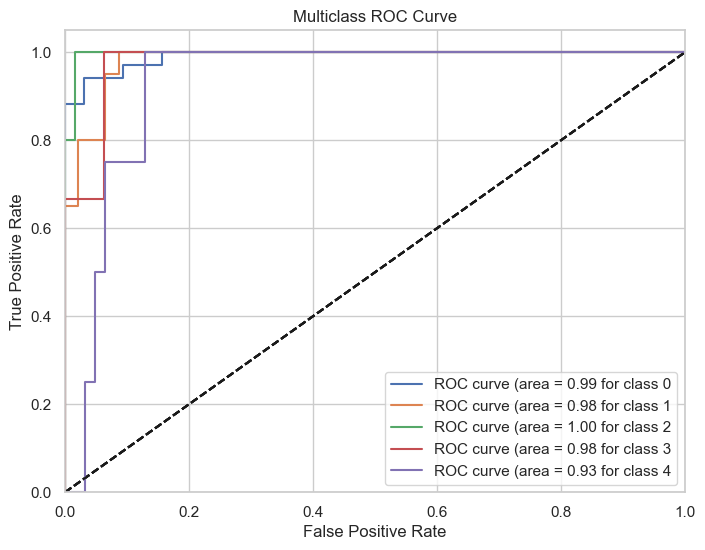

In [55]:
#X, y = drug_df.data, drug_df.target
y = label_binarize(y, classes=["DrugY", "drugX", "drugA", "drugB", "drugC"])  # Binarize the labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Create a One-vs-Rest classifier (you can use any other classifier)
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f} for class {i}')
    plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')

plt.show()